In [11]:
import pandas as pd

# Load data
df = pd.read_csv("owid-covid-data.csv")

In [12]:
# Display the first 5 rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


### To understand the structure of the dataset and identify any columns with missing values.

In [13]:
# Check basic info and nulls
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
                                            ...  
total_deaths                                17631
location                                        0
date                                            0
population                                      0
iso_code                                        0
Length: 67, dtype: int64

### Narrowing down the dataset and ensuring it's clean enough to analyze.

In [14]:
# Keep only the needed columns
columns_needed = [
    'iso_code', 'location', 'date', 'total_cases', 'new_cases', 
    'total_deaths', 'new_deaths', 'total_vaccinations', 
    'people_fully_vaccinated', 'population'
]
df = df[columns_needed]

In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter specific countries (e.g., Kenya, India, USA)
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

In [16]:
# Fill missing numeric data with 0 (or use interpolation if needed)
df.fillna(0, inplace=True)

In [18]:
# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Calculate vaccination rate
df['vaccination_rate'] = df['people_fully_vaccinated'] / df['population']

# preview cleaned data
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_fully_vaccinated,population,death_rate,vaccination_rate
173549,IND,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,1417173120,NaN,0.0
173550,IND,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,1417173120,NaN,0.0
173551,IND,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,1417173120,NaN,0.0
173552,IND,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,1417173120,NaN,0.0
173553,IND,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,1417173120,NaN,0.0


## Exploratory Data Analysis (EDA)

### Visualizing total cases and deaths over time

### Comparing new daily cases

### Analyzing death rate

### Visualizing vaccination progress

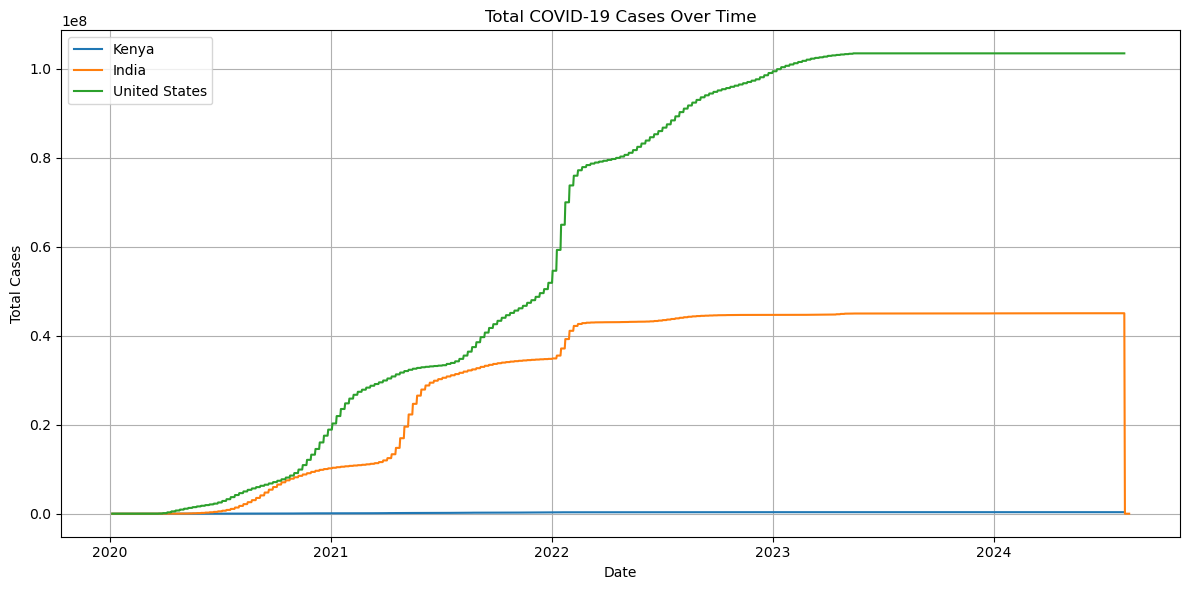

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

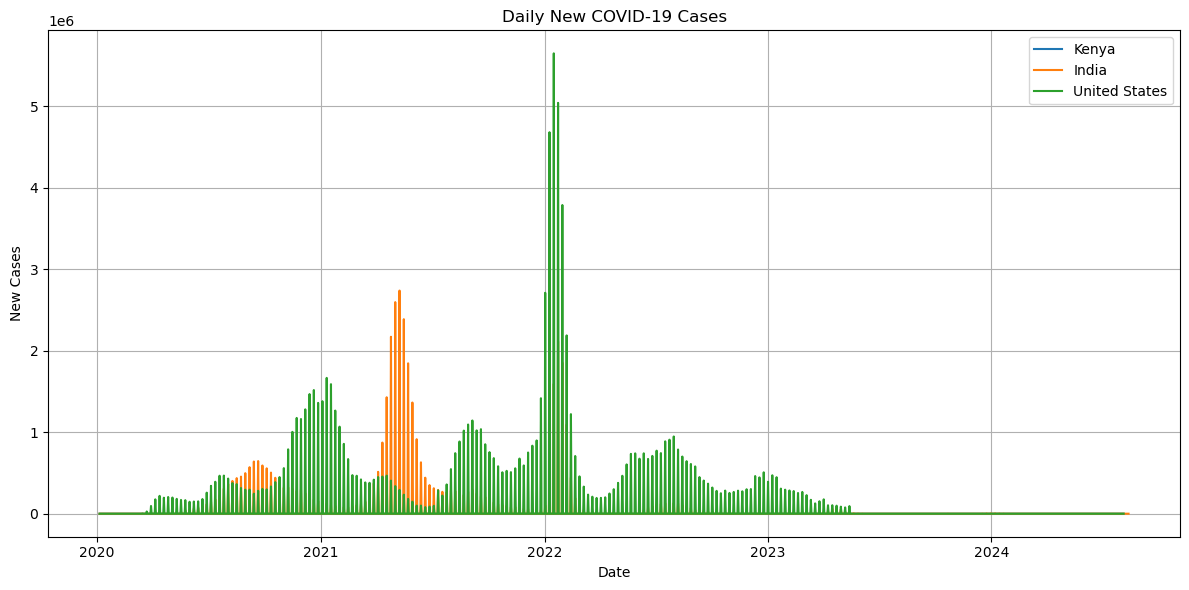

In [20]:
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

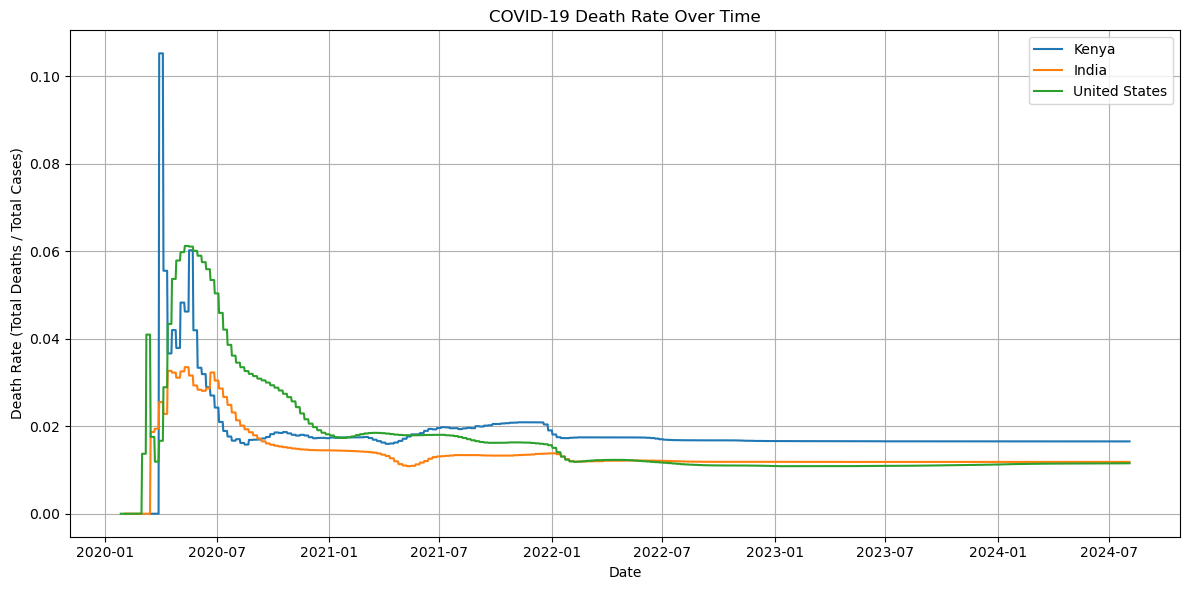

In [21]:
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

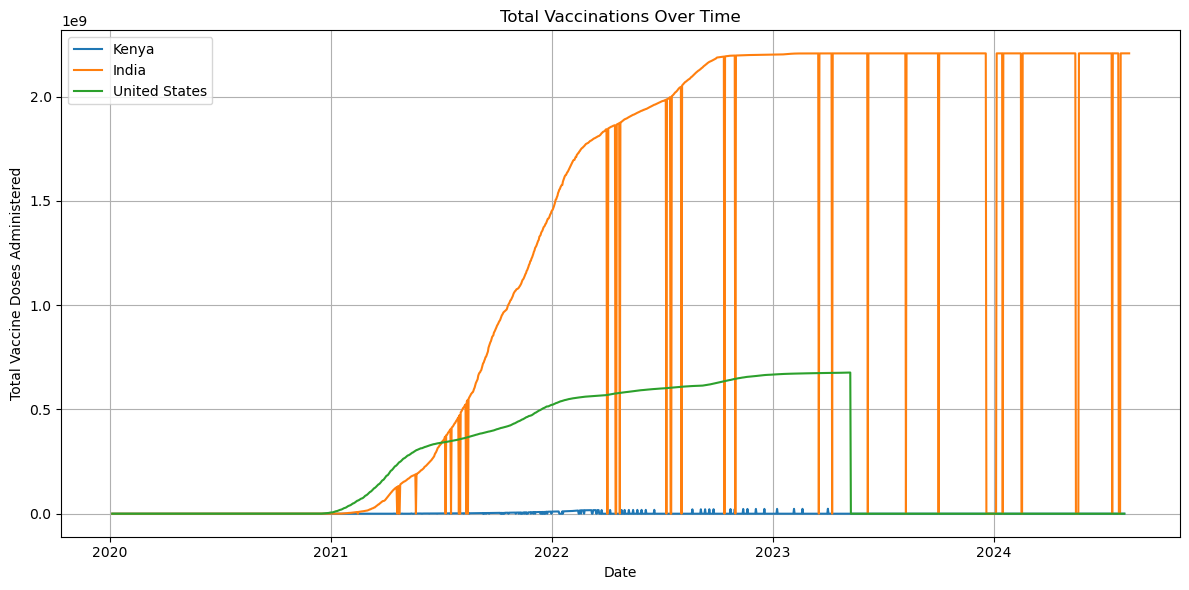

In [22]:
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccine Doses Administered')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

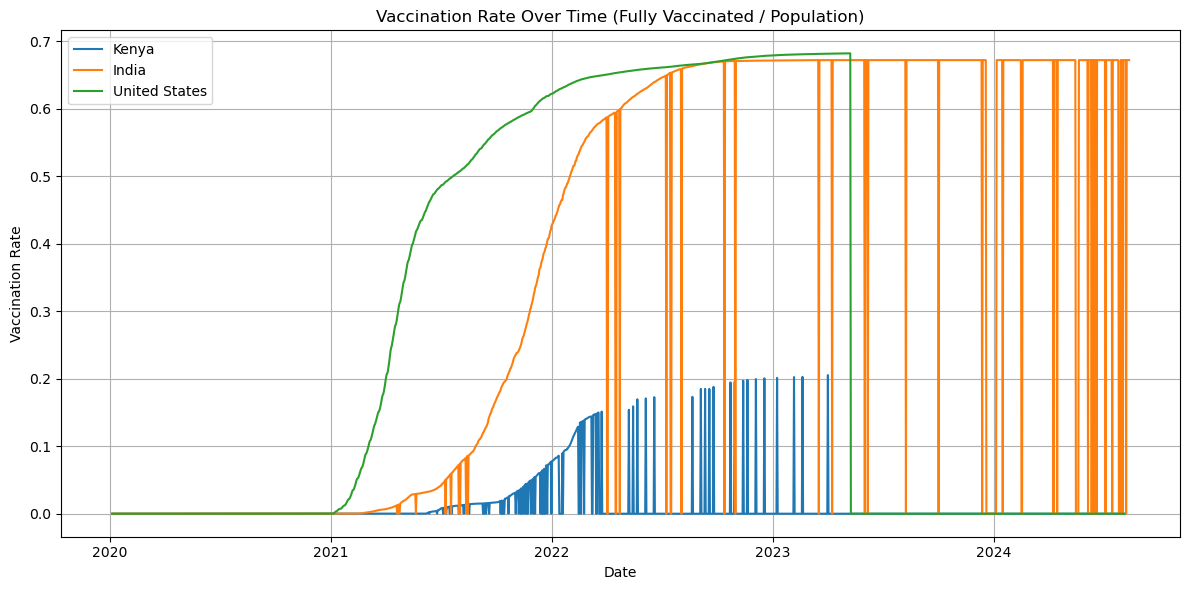

In [23]:
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['vaccination_rate'], label=country)

plt.title('Vaccination Rate Over Time (Fully Vaccinated / Population)')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##  Key Insights

1. **India** experienced sharp waves in mid-2021, likely due to the Delta variant.
2. **The USA** had the highest vaccination count but also consistently high case numbers.
3. **Kenya** had a relatively low number of total cases but slower vaccine rollout.
4. Death rates were higher earlier in the pandemic, declining as treatment and vaccination improved.
5. Vaccination progress correlated with reduced death rates, especially in later waves.